In [30]:
import pandas as pd

In [31]:
dff = pd.read_excel('BlinkIT Grocery Data.xlsx')

In [32]:
df = dff.copy()

In [33]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [34]:
df.shape

(8523, 12)

In [35]:
# 17% of the values in the item weight category are missing. this is a large amount so we cant directly drop those null valued rows.
df['Item Weight'] = df.groupby('Item Identifier')['Item Weight'].transform(lambda x: x.fillna(x.mean()))

In [36]:
df.isnull().sum()   # now only 4 left, so we can drop them.

Item Fat Content             0
Item Identifier              0
Item Type                    0
Outlet Establishment Year    0
Outlet Identifier            0
Outlet Location Type         0
Outlet Size                  0
Outlet Type                  0
Item Visibility              0
Item Weight                  4
Sales                        0
Rating                       0
dtype: int64

In [37]:
df.dropna(subset=['Item Weight'], inplace=True)

In [38]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,2016.449818,0.066112,12.875420,141.010021,3.965853
std,3.189968,0.051586,4.646098,62.283594,0.605781
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026983,8.785000,93.844900,4.000000
50%,2016.000000,0.053925,12.650000,143.047000,4.000000
75%,2018.000000,0.094558,16.850000,185.676600,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


<Axes: xlabel='Item Visibility'>

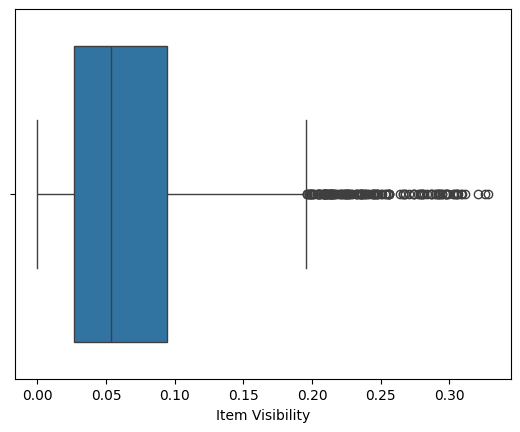

In [39]:
import seaborn as sns
sns.boxplot(data = df, x = 'Item Visibility')  # outliers exist. but item visibility can vary, we cant remove it considering outlier.

<Axes: xlabel='Rating'>

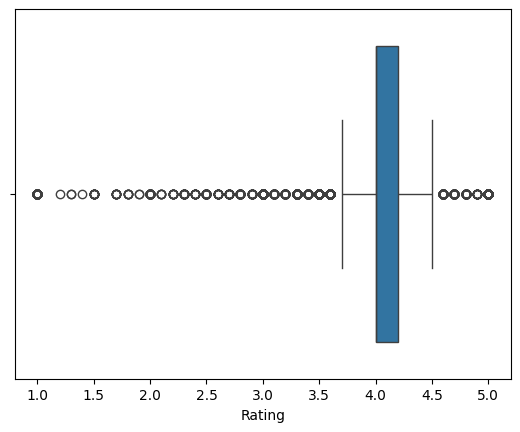

In [40]:
sns.boxplot(data = df, x = 'Rating') # outliers exist, but since rating is actually possible between 0 and 5, we wont remove the outliers here.

In [42]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [47]:
df['Item Fat Content'] = df['Item Fat Content'].replace('LF', 'Low Fat')

In [48]:
df['Item Fat Content'] = df['Item Fat Content'].replace('low fat', 'Low Fat')

In [49]:
df['Item Fat Content'] = df['Item Fat Content'].replace('reg', 'Regular')

In [50]:
df['Item Fat Content'].value_counts()

Item Fat Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64

In [62]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [63]:
df['Outlet_Age'] = 2026 - df['Outlet Establishment Year']

In [64]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating,Outlet_Age
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0,14
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0,4
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0,10
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0,12
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0,11


In [65]:
df.to_excel('cleaned_blinkit.xlsx')